In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load dataset
file_path = r'C:\Users\Dell\Desktop\Machine Learning\A1\AML_Ass01\AML_Ass01\kmeans_dataset.csv'
data = pd.read_csv(file_path)

# Display basic info
print("Dataset Head:\n", data.head())
print("Missing Values:\n", data.isnull().sum())

# Handle missing values (fill with median)
data.fillna(data.median(), inplace=True)

# Select relevant numerical features for clustering
features = ['Age', 'Annual_Income', 'Spending_Score', 'Website_Visits', 'Total_Purchase_Amount']

# Normalize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features])

# Convert back to DataFrame
data_scaled = pd.DataFrame(data_scaled, columns=features)

print("Preprocessed Data:\n", data_scaled.head())


Dataset Head:
    Customer_ID   Age  Annual_Income  Spending_Score  Website_Visits  \
0            1  56.0       299578.0            26.0             3.0   
1            2  69.0        80313.0            62.0            27.0   
2            3  46.0       137813.0             4.0             7.0   
3            4  32.0            NaN            89.0            14.0   
4            5  60.0       123632.0            42.0            20.0   

   Product_Categories_Purchased  Total_Purchase_Amount  \
0                           7.0                99756.0   
1                           9.0                    NaN   
2                           NaN                 7110.0   
3                          10.0                 6930.0   
4                           3.0                40422.0   

   Average_Session_Duration  Return_Rate  Discount_Usage  
0                      33.0        24.68           66.66  
1                      17.0        35.11           16.27  
2                      24.0     

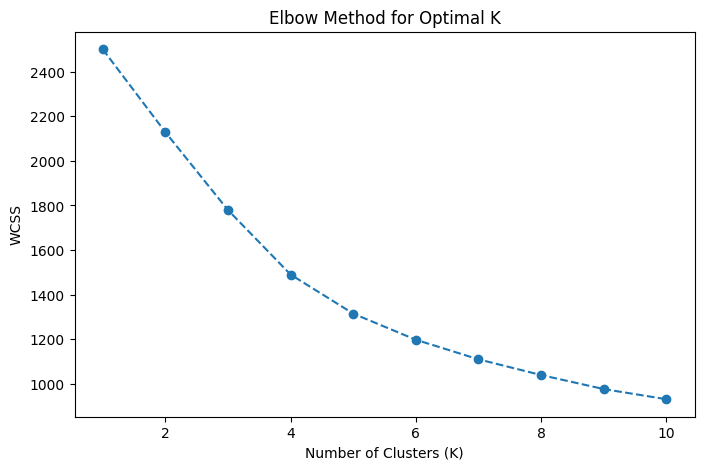

In [2]:
wcss = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()


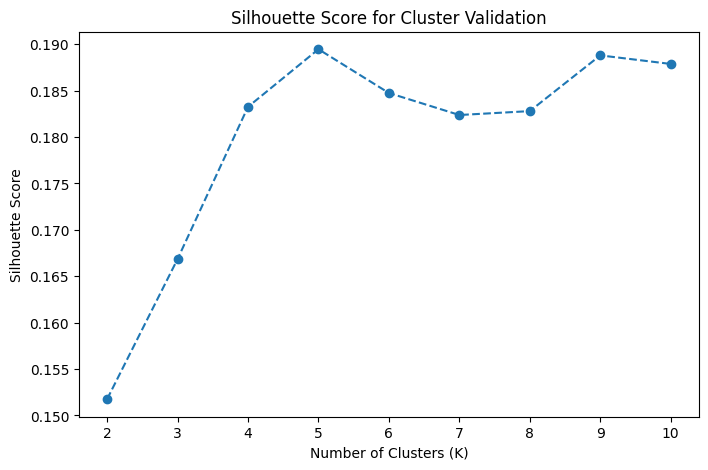

In [3]:
silhouette_scores = []

for k in range(2, 11):  # Silhouette score is valid for K >= 2
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    silhouette_scores.append(silhouette_score(data_scaled, labels))

# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Cluster Validation')
plt.show()


In [4]:
# Choose optimal K based on Elbow & Silhouette (e.g., K=4)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
data['Cluster'] = kmeans.fit_predict(data_scaled)

# Print cluster centers
print("Cluster Centers:\n", scaler.inverse_transform(kmeans.cluster_centers_))


Cluster Centers:
 [[4.37000000e+01 2.99578000e+05 3.40000000e+01 1.42000000e+01
  9.97560000e+04]
 [4.53554217e+01 8.63866928e+04 8.13253012e+01 1.56506024e+01
  2.41283554e+04]
 [4.14476744e+01 7.54411279e+04 3.20581395e+01 2.29825581e+01
  2.70663052e+04]
 [5.47368421e+01 7.89243882e+04 3.41907895e+01 8.17763158e+00
  2.54689507e+04]]


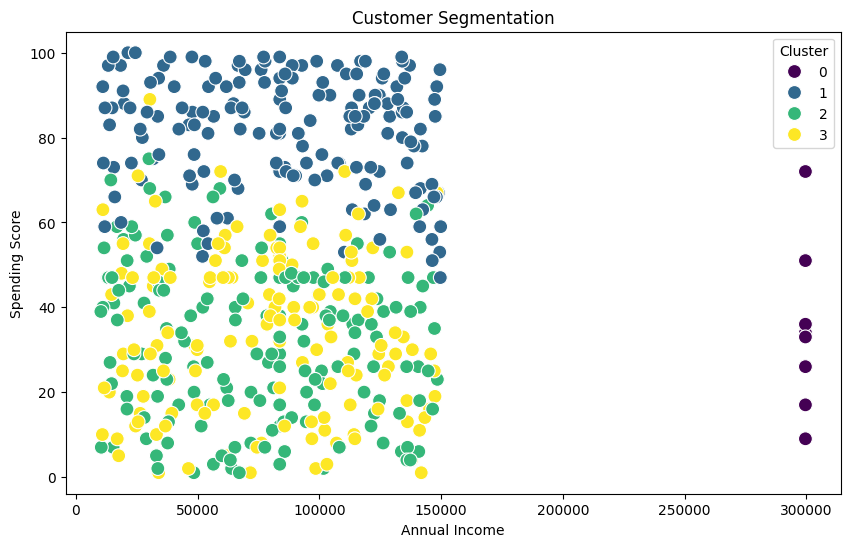

In [5]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Annual_Income'], y=data['Spending_Score'], hue=data['Cluster'], palette='viridis', s=100)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer Segmentation')
plt.legend(title='Cluster')
plt.show()


In [7]:
Q1 = data_scaled.quantile(0.25)
Q3 = data_scaled.quantile(0.75)
IQR = Q3 - Q1

# Outliers: Below (Q1 - 1.5*IQR) or Above (Q3 + 1.5*IQR)
outliers = (data_scaled < (Q1 - 1.5 * IQR)) | (data_scaled > (Q3 + 1.5 * IQR))
outlier_counts = outliers.sum()

print("Number of Outliers per Feature:\n", outlier_counts)

# Remove outliers
data_filtered = data_scaled[~outliers.any(axis=1)]


Number of Outliers per Feature:
 Age                       0
Annual_Income            10
Spending_Score            0
Website_Visits            0
Total_Purchase_Amount    10
dtype: int64


C:\Users\Dell\AppData\Local\Temp\ipykernel_16108\3210519759.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Cluster'] = kmeans_filtered.fit_predict(data_filtered)


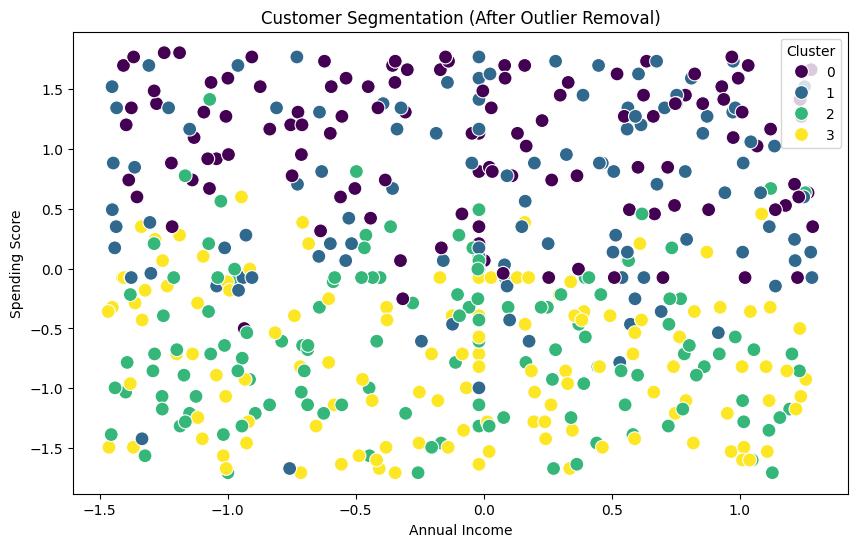

In [8]:
kmeans_filtered = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
data_filtered['Cluster'] = kmeans_filtered.fit_predict(data_filtered)

# Visualize clustering after removing outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_filtered['Annual_Income'], y=data_filtered['Spending_Score'], hue=data_filtered['Cluster'], palette='viridis', s=100)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer Segmentation (After Outlier Removal)')
plt.legend(title='Cluster')
plt.show()


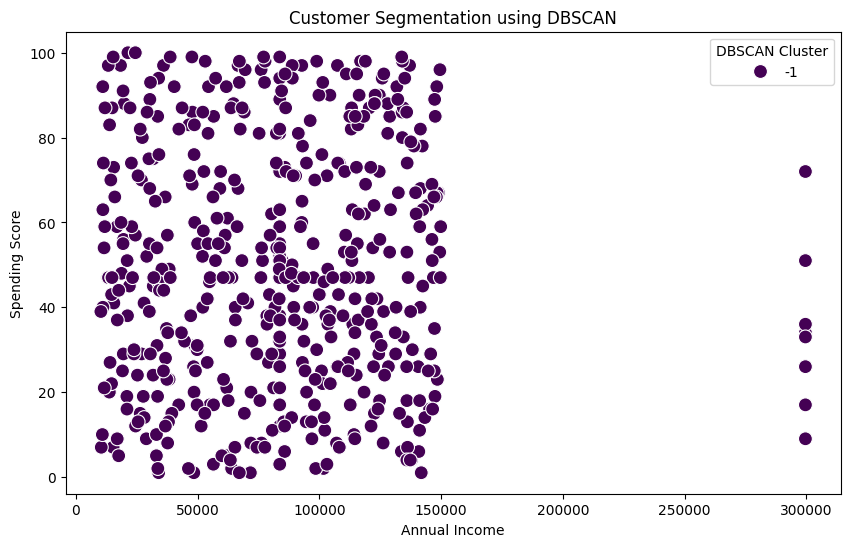

In [9]:
from sklearn.cluster import DBSCAN

# Using the normalized data (data_scaled) for DBSCAN clustering.
# Note: You may need to adjust the 'eps' and 'min_samples' parameters for your dataset.
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(data_scaled)

# Add the DBSCAN cluster labels to your original data (or to a copy for plotting).
data['DBSCAN_Cluster'] = dbscan_labels

# Visualize DBSCAN clustering using Annual_Income vs Spending_Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Annual_Income'], 
                y=data['Spending_Score'], 
                hue=data['DBSCAN_Cluster'], 
                palette='viridis', 
                s=100)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer Segmentation using DBSCAN')
plt.legend(title='DBSCAN Cluster')
plt.show()
